# Import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Membaca data dari file

In [ ]:
path_dataset = "/content/supplier.xlsx"
df = pd.read_excel(path_dataset)
data = df.values.tolist()

#Fuzzy set

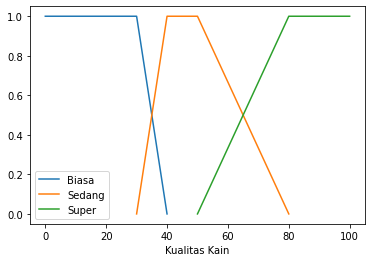

In [ ]:
trapesium1 = [[40,0],[30,1],[0,1]]
trapesium2 =[[80,0],[50,1],[40,1],[30,0]]
trapesium3 = [[100,1],[80,1],[50,0]]

bangun_datar = [trapesium1, trapesium2, trapesium3]

fig,ax = plt.subplots()

for a in bangun_datar:
  xs, xy = zip(*a)
  ax.plot(xs, xy)

plt.xlabel("Kualitas Kain")
plt.legend(["Biasa", "Sedang", "Super"])

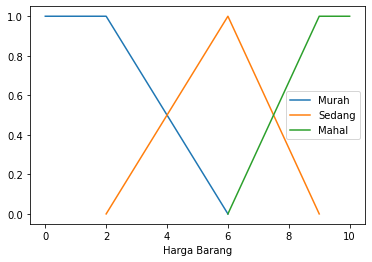

In [ ]:
trapesium1 = [[6,0], [2,1], [0,1]]
segitiga1 = [[9,0], [6,1], [2,0]]
trapesium2 = [[10,1], [9,1], [6,0]]

bangun_datar = [trapesium1, segitiga1, trapesium2]

fig,ax = plt.subplots()

for a in bangun_datar:
  xs, ys = zip(*a)
  ax.plot(xs,ys)

plt.xlabel("Harga Barang")
plt.legend(["Murah", "Sedang", "Mahal"])

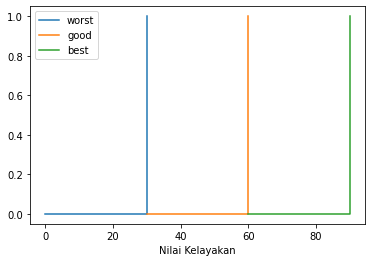

In [ ]:
trapesium1 = [[0,0],[30,0],[30,1]]
trapesium2 = [[30,0],[60,0],[60,1]]
trapesium3 = [[60,0],[90,0],[90,1]]

bangun_datar = [trapesium1, trapesium2, trapesium3]

fig,ax = plt.subplots()

for a in bangun_datar:
  xs, xy = zip(*a)
  ax.plot(xs, xy)

plt.xlabel("Nilai Kelayakan")
plt.legend(["worst", "good", "best"])

In [ ]:
sumber = [
    ['super','best','best','good'],
    ['sedang','best','good','worst'],
    ['biasa','good','worst','worst']
]
header = ['kualitas/harga', 'murah','sedang','mahal']

print(tabulate(sumber, headers=header, tablefmt="fancy_grid"))

╒══════════════════╤═════════╤══════════╤═════════╕
│ kualitas/harga   │ murah   │ sedang   │ mahal   │
╞══════════════════╪═════════╪══════════╪═════════╡
│ super            │ best    │ best     │ good    │
├──────────────────┼─────────┼──────────┼─────────┤
│ sedang           │ best    │ good     │ worst   │
├──────────────────┼─────────┼──────────┼─────────┤
│ biasa            │ good    │ worst    │ worst   │
╘══════════════════╧═════════╧══════════╧═════════╛


#*Fuzzification*

In [ ]:
def func_lingustik(x, a, b, c, d):
  if (x > a) and (x < b):
    return (x-a)/(b-a)
  elif c < x < d :
    return -(x-d)/(d-c)
  elif (x >= b) and (x <= c):
    return 1
  elif (x<= a) or (x >= d):
    return 0


In [ ]:
def fuzzification(x, y):
  qua_biasa = func_lingustik(x, 0, 0, 20, 40)
  qua_sedang = func_lingustik(x, 30, 40, 50, 80)
  qua_super = func_lingustik(x, 50, 80, 100, 0)
  prc_mahal = func_lingustik(y, 6, 9, 10, 0)
  prc_sedang = func_lingustik(y, 2, 6, 6, 9)
  prc_murah = func_lingustik(y, 0, 0, 2, 6)
  return [qua_biasa, qua_sedang, qua_super], [prc_mahal, prc_sedang, prc_murah] 


# *Inference*

In [ ]:
def inference(nilai1, nilai2):
  best = 0
  good = 0
  worst = 0
  if nilai1[0] != 0 and nilai2[0] != 0:
    value = min(nilai1[0] ,nilai2[0])
    worst = max(worst, value)
  if nilai1[0] != 0 and nilai2[1] != 0:
    value = min(nilai1[0] ,nilai2[1])
    worst = max(worst, value)
  if nilai1[0] != 0 and nilai2[2] != 0:
    value = min(nilai1[0] ,nilai2[2])
    good = max(good, value)
  if nilai1[1] != 0 and nilai2[0] != 0:
    value = min(nilai1[1],nilai2[0])
    worst = max(worst, value)
  if nilai1[1] != 0 and nilai2[1] != 0:
    value = min(nilai1[1],nilai2[1])
    good = max(good, value)
  if nilai1[1] != 0 and nilai2[2] != 0:
    value = min(nilai1[1],nilai2[2])
    best = max(best, value)
  if nilai1[2] != 0 and nilai2[0] != 0:
    value = min(nilai1[2],nilai2[0])
    good = max(good, value)
  if nilai1[2] != 0 and nilai2[1] != 0:
    value = min(nilai1[2],nilai2[1])
    best = max(best, value)
  if nilai1[2] != 0 and nilai2[2] != 0:
    value = min(nilai1[2],nilai2[2])
    best = max(best, value)
  return [best, good, worst]

# *Defuzzification*

In [ ]:
def defuzzi (x):
  if x[0] != 0 or x[1] != 0 or x[2] != 0:
    hasil = ((x[0] * 90) + (x[1] * 60) + (x[2] * 30))/((x[0] + x[1] + x[2]))
  else:
    hasil = 0
  return hasil

# Main Program


In [ ]:
nKelayakan = []
for i in range(len(data)):
  nilai1, nilai2 = fuzzification(data[i][1], data[i][2]) 
  nKelayakan.append(defuzzi (inference(nilai1, nilai2)))

df["value"] = nKelayakan
ds = df.sort_values(by=['value','kualitas'], ascending=False)
ds.head(5)

,id,kualitas,harga,value
2,3,98,2,90.0
90,91,98,3,90.0
51,52,94,3,90.0
33,34,93,4,90.0
91,92,83,3,90.0


In [ ]:
frame = pd.DataFrame(ds.head(5)) 
write = pd.ExcelWriter("Hasil Fuzzy Logic.xls")
frame.to_excel(write, index=False)
write.save()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  if (await self.run_code(code, result,  async_=asy)):
